# TASK 2 :- Prediction using UnSupervised ML


In this task, we are going to predict the optimum number of clusters from the given iris dataset and represent it visually. This includes unsupervised learning.

Data Science & Business Analytics Internship Task_2

Author: Pankaj Kande

# Step 1: Importing Libraries needed to perform task

In [251]:
import pandas  as pd
import numpy   as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings                   
warnings.filterwarnings('ignore')

                                     Reading dataset

In [252]:
df =  pd.read_csv(r"S:\Sparks Foundation\Iris.csv")

In [253]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [254]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


# Step 2: Data Visualization

                                EDA  [Exploratory Data Analysis]

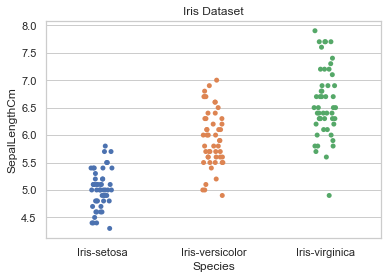

In [255]:
sns.set(style = 'whitegrid')
ax = sns.stripplot(x ='Species',y = 'SepalLengthCm',data = df);
plt.title('Iris Dataset')
plt.show()

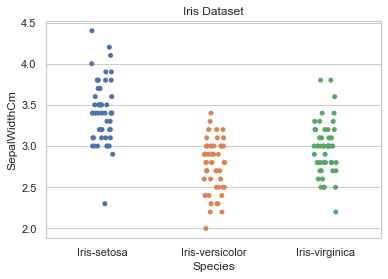

In [256]:
sns.set(style = 'whitegrid')
ax = sns.stripplot(x ='Species',y = 'SepalWidthCm',data = df);
plt.title('Iris Dataset')
plt.show()

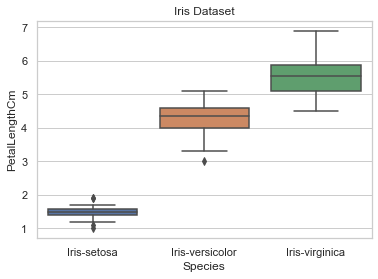

In [257]:
sns.boxplot(x='Species',y='PetalLengthCm',data=df)
plt.title("Iris Dataset")
plt.show()

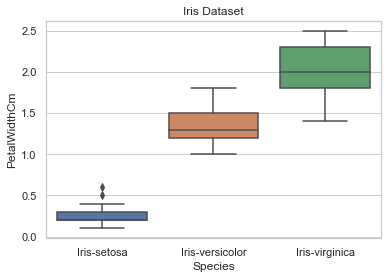

In [258]:
sns.boxplot(x='Species',y='PetalWidthCm',data=df)
plt.title("Iris Dataset")
plt.show()

                                     Count plot

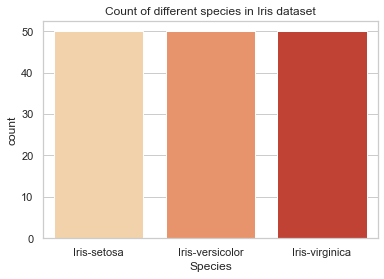

In [259]:

sns.countplot(x='Species', data=df, palette="OrRd")
plt.title("Count of different species in Iris dataset")
plt.show()

                             Correlation Metrics

[Text(0.5, 1.0, 'Correlation between variables')]

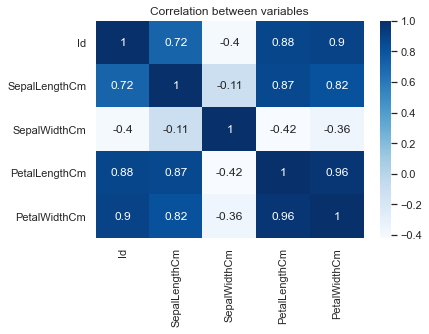

In [260]:

sns.heatmap(df.corr(),cmap = "Blues", annot=True).set(title='Correlation between variables')

Heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors. Or we can also say that these Heat maps display numeric tabular data where the cells are colored depending upon the contained value.

Heat maps are great for making trends in this kind of data more readily apparent, particularly when the data is ordered and there is clustering.

The columns with the correlation 1 are the best correlated and vice versa.

                       Histogram of all data's feature Distribution

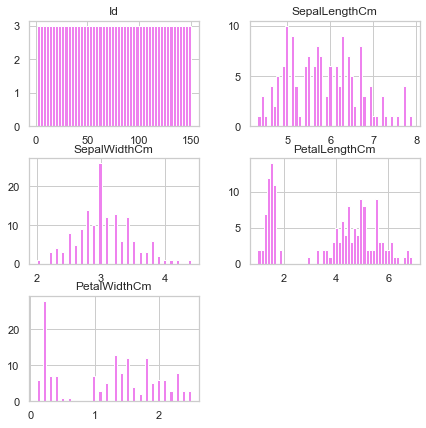

In [261]:
df.hist(bins=50 , figsize=(7,7), color = ['violet'] )
plt.show()

# Step 3: DATA PREPROCESSING / CLEANING

In [262]:
df.shape

(150, 6)

In [263]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [264]:
df.isnull().sum().sort_values(ascending = False)

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [265]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [266]:
df.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [267]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [268]:
iris = pd.DataFrame(df)
iris_df = df.drop(columns=["Id" , "Species"])

In [269]:
iris_df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [270]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [271]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


                      Finding the optimum number of clusters using k-means clustering


                                 Finding the value of clusters

* Before clustering the data using kmeans, we need to specify the number of clusters. 
* In order to find the optimum number of clusters, there are various methods available like Silhouette Coefficient and the Elbow method. 
* Here, The Elbow Method is used.

In [272]:
iris_df=iris_df.iloc[:,[0,1,2,3]].values


In [273]:
from sklearn.cluster import KMeans

In [274]:
ssd = []
for k in range(1 , 11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(iris_df)
    sc = kmeans.score(iris_df)
    ssd.append(sc)

In [275]:
ssd = np.round(np.abs(ssd))
ssd

array([681., 152.,  79.,  57.,  47.,  39.,  35.,  30.,  28.,  26.])

In [276]:
x = list(range(1,11))
x

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

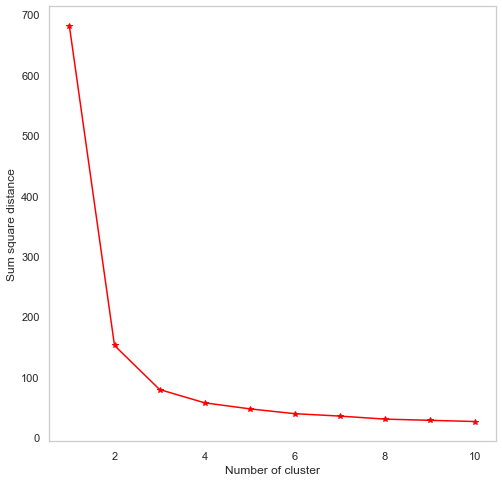

In [277]:
plt.figure(figsize= (8,8))
plt.plot(x , ssd , marker = "*", color='red') 
plt.xlabel("Number of cluster")
plt.ylabel("Sum square distance")
plt.grid()

We can see that after 3 the drop in SSD is minimal. So we choose 3 as the optimal number of clusters.

# Step 4 : Initializing K-Means With Optimum Number Of Clusters

In [278]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)

# Returns a label for each data point based on the number of clusters
y_kmeans = kmeans.fit_predict(iris_df)


# Step 5 : Predicting Values

In [279]:
y_kmeans 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [280]:
iris["labels"] = y_kmeans 

In [281]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
5,6,5.4,3.9,1.7,0.4,Iris-setosa,1
6,7,4.6,3.4,1.4,0.3,Iris-setosa,1
7,8,5.0,3.4,1.5,0.2,Iris-setosa,1
8,9,4.4,2.9,1.4,0.2,Iris-setosa,1
9,10,4.9,3.1,1.5,0.1,Iris-setosa,1


In [282]:
iris.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [283]:
iris.labels.value_counts()

0    62
1    50
2    38
Name: labels, dtype: int64

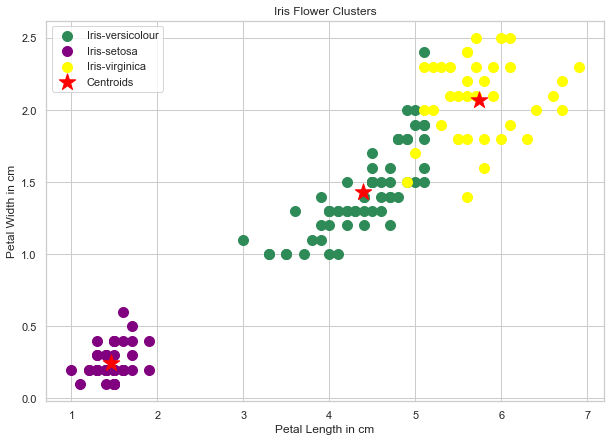

In [284]:
fig = plt.figure(figsize=(10, 7))
plt.title('Clusters with Centroids',fontweight ='bold', fontsize=20)
plt.scatter(iris_df[y_kmeans == 0, 2], iris_df[y_kmeans == 0, 3], s = 100, c = 'seagreen', label = 'Iris-versicolour')
plt.scatter(iris_df[y_kmeans == 1, 2], iris_df[y_kmeans == 1, 3], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(iris_df[y_kmeans == 2, 2], iris_df[y_kmeans == 2, 3], s = 100, c = 'yellow', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 300, c = 'red',marker='*', 
            label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()

# Conclusion
I was able to successfully carry-out prediction using Unsupervised Machine Learning task and was able to evaluate the model using clustering.